# Dealing with Missing Data

We already reviewed Pandas operations for missing data, now let's apply this to clean a real data file. Keep in mind, there is no 100% correct way of doing this, and this notebook just serves as an example of some reasonable approaches to take on this data.

#### Note: Throughout this section we will be slowly cleaning and adding features to the Ames Housing Dataset for use in the next section. Make sure to always be loading the same file name as in the notebook.

#### 2nd Note: Some of the methods shown here may not lead to optimal performance, but instead are shown to display examples of various methods available.
-----

## Imports

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

for some reason you're not familiar

with kind of this basic Python code,

all it does is it opens up a text file in read  i.e 'r'mode,

sets it to the variable f, and then it will read i.e f.read()  it in

and we're gonna print out those results.

The with operator allows us to essentially

automatically close this file

instead of holding it open even after we read it.

In [6]:
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data


In [12]:
df = pd.read_csv("../DATA/Ames_outliers_removed.csv") #we are using the removed outliers CSV

In [14]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
len(df.columns)

81

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual  

### Removing the PID

We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [25]:
df = df.drop('PID',axis=1) #axis =1 cause we are dropping an entire column

In [27]:
len(df.columns)

80

## Observing NaN Features

In [29]:
df.isnull()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,False,False,False,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2923,False,False,True,False,False,True,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2924,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2925,False,False,False,False,False,True,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [33]:
df.isnull().sum() #as we discussed in pandas, it's gonna treat falses as zeros and trues as ones. 
                # And if you run this, you essentially now have a series where it's going to report to you how many rows are you missing values
                 # for every single feature.

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

But more importantly, what I really wanna know

is some sort of ratio of what's missing.

It's not very helpful to me to just see,

okay, I'm missing 490 lot frontage values.

Is that a lot or is that a little?

What might be better is to say,

"I'm missing some percentage of all lot frontage."

So instead what we're gonna say is the following,

I'm going to create a function

that is essentially gonna report back

the percentage of what is missing

In [37]:
len(df)

2927

In [39]:
100* df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

I'm going to create a function

that is essentially gonna report back

the percentage of what is missing.

So for example, I could say something like,

100 * df.isnull().sum() / len(df).

And this would transform everything into a percentage

because we're just dividing by the actual number

of rows in the data frame versus how many are missing

and then multiplying by a hundred.

So I can see I'm missing 16.74%

of all possible lot frontage values.

In [43]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    # And then what I wanna do is also figure out where the percentage is actually greater than zero. I'm not super interested in things
    # that are not missing any data for this particular case.
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [45]:
percent_nan_dummy = percent_missing(df)

In [47]:
percent_nan_dummy

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

So we're obviously missing data

on every single one of these features,

but for some of them we're missing a ton of rows.

So 99.59% of all houses in the dataset

don't actually have information about pool quality.

Now that could be for two reasons.

One, is that it simply wasn't collected,

or two, NAN is more of an indication

of whether or not they have a pool.

So maybe instead of having nan,

it should just be zero or something there.

We would have to go back to that feature text document

and begin to explore that further.

So I'm saying the X axis should be these index values,

the actual feature names, and then Y

is going to be equal to percent_nan,

which are the actual corresponding values themselves.

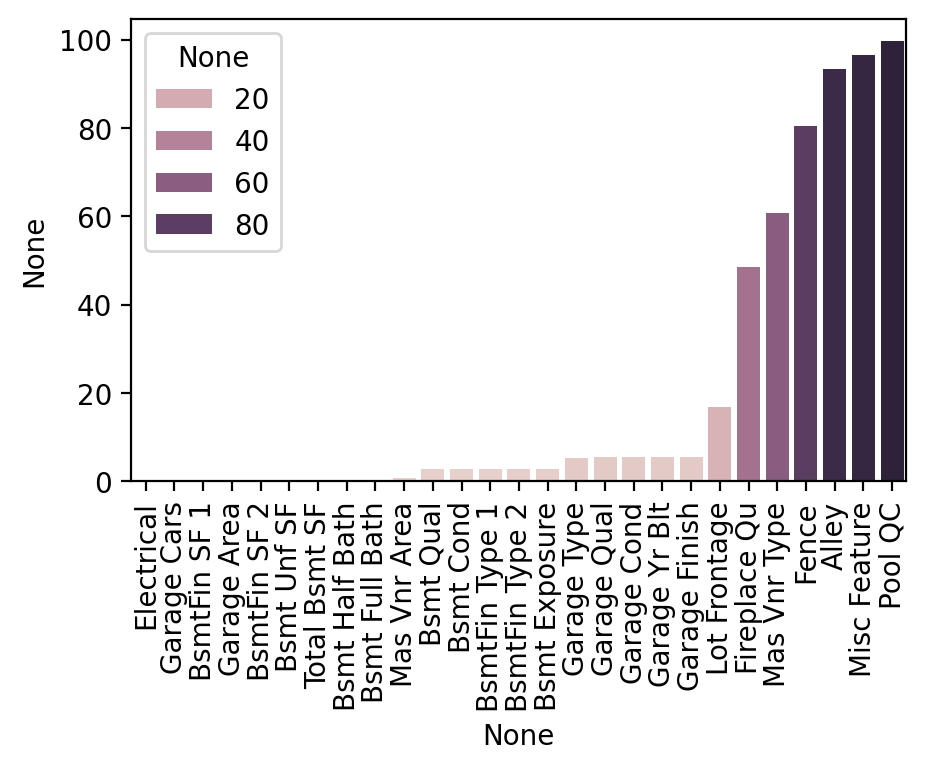

In [66]:
plt.figure(figsize = (5,3), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy, hue = percent_nan_dummy )
plt.xticks(rotation=90);

 plt.xticks(rotation=90).

And what it's going to do

is it's going to rotate everything for us

as far as the features.

So that's just rotating this actual xtick.

And now I can visually see percentage-wise,

what am I missing a lot of

versus what am I maybe just gonna drop

a few rows of data worth.

# Removing Features or Removing Rows

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category. 

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!

## Working based on Rows Missing Data

## Filling in Data or Dropping Data?

Let's explore how to choose to remove or fill in missing data for rows that are missing some data. Let's choose some threshold where we decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). We will choose 1% as our threshold. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you don't want to drop a very high threshold like 50% , you should also explore correlation to the dataset, maybe it makes sense to drop the feature instead.

Based on the text description of the features, you will see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none".

## Example of Filling in Data : Basement Columns

(0.0, 1.0)

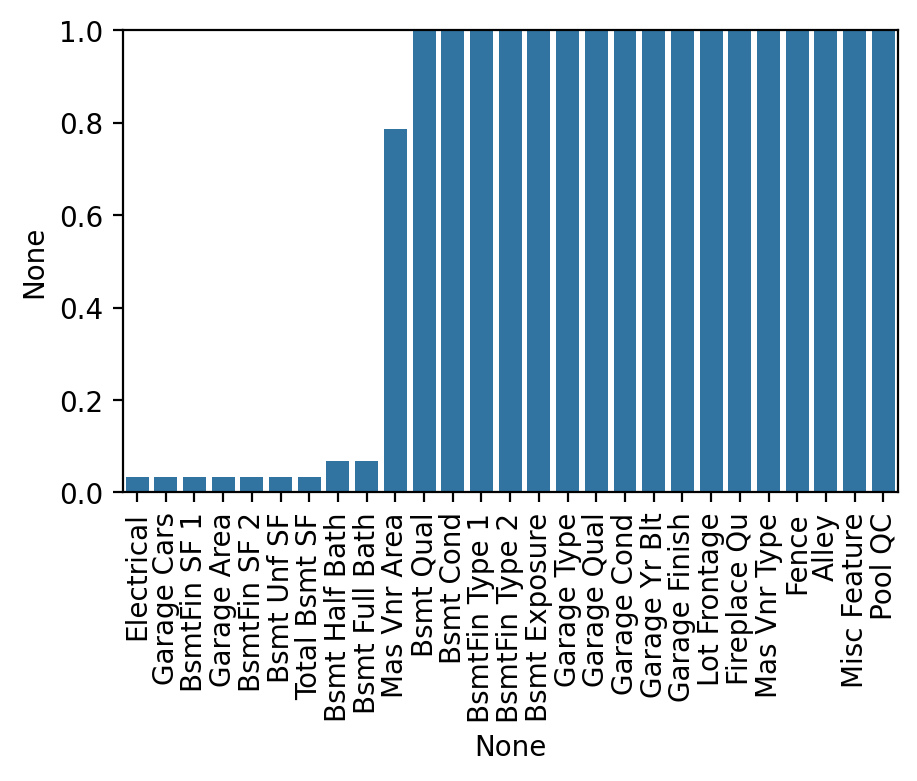

In [70]:
plt.figure(figsize = (5,3), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

Let's drop or fill the rows based on this data. You could either manually fill in the data (especially the Basement data based on the description text file) OR you could simply drop the row and not consider it. Watch the video for a full explanation of this, in reality it probably makes more sense to fill in the Missing Basement data since its well described in the text description.

In [74]:
# Could also imply we should ex
percent_nan_dummy[percent_nan_dummy < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

Essentially asking the question, what are these features

that have the percent missing less than 1%.

And here they are, Electrical, Garage Area, et cet

it's such a low percentage of rows that are missing it

that it may actually make sense maybe

to just drop one or two rows.

Especially if later on we notice

that it's just one or two houses

that are actually missing all this information.era.

In [162]:
# here instead of 100/len(df) this can also be written (0.034165/100)*len(df) which will give the number of rows approx

In [17]:
100/len(df)

0.0341646737273659

what actual percentage is 0.034165.

And in fact, if you essentially reverse something

and say something like a hundred divided by the length

of the data frame, you will realize that a hundred divided

by the length of the data frame is exactly 0.03416.

The exact number shown here.

What is that actually telling us?

It's essentially telling us that only one row

is missing information for Electrical.

Only one row is missing information

for garage area, et cetera.

So in fact, all of these percentages

is just significant for one row.

It will probably make a lot of sense to drop that one row.

However, we don't know yet if it's one row for Electrical,

another row that's separate from that

for the Garage Area that's missing,

another row separate for Total Basement, et cetera.

So we'

And here we can also then begin to see

that 0.06832

is the doubling of 0.034165,

which means it's essentially just two rows

that are missing Basement Full Bath and Basement Half Bath.ll have to begin to figure that out.

In [164]:
(0.034165/100)*len(df) # here we can see that it gives 1 row

0.99932625

Let's go ahead and explore just one of the rows

that's missing, for example, Electrical.

In [86]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


I can begin to see that it's missing other values,

but it doesn't look like

it's missing things like a Garage Area.

Let's take a closer look by checking

what the value is for Garage Area.

You run that, and you can see

that this one actually does have the Garage Area,

which means this row for Electrical

that has Electrical missing is not the same

as the row that has Garage Area missing.

In [92]:
df[df['Electrical'].isnull()]['Garage Area']

1576    400.0
Name: Garage Area, dtype: float64

But let's check out something like the one

that's missing Basement Full Bath, or Basement Half Bath.

So what I'm gonna say here is,

check where my data frame happens to be missing Basements.

In [95]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


Alright, now as expected from this result,

I can see that I'm missing Basement Half Bath information

for these two particular rows.

And essentially now I have to begin to decide,

am I going to fill in these values?

Or am I going to just drop these rows?

And either approach in this particular case

is probably pretty valid.

It's not a big deal to just drop two rows of information.

More often than not, you're gonna try to retain

as much data as possible, but it wouldn't be too bad

to actually drop these rows.

When we're thinking about dropping rows,

it's probably a good idea to start

from the least percent missing to higher percent missing.

When we're thinking about dropping rows,

it's probably a good idea to start

from the least percent missing to higher percent missing.

All of these particular features happen

to be missing less than 1%, easily within our,

kind of, arbitrary threshold of being able to drop a row

if it falls into one

of these low percent feature missing columns.

So what are we gonna do then?

Well, what I can do is I actually know that the row

that is missing Electrical is not the same as the row

that's missing Garage Area.

So there's a single row missing Electrical

and a single row missing Garage Area.

And recall, I know this because of this line right here

where I checked for the data frame where null is missing.

It was index 1576, and it did have a value for Garage Area.

Meaning that there's another row missing Garage Area.

So what we're gonna do then is the following.

I'm going to say my data frame

is equal to df.dropna,

and along axis equal to 0,

because I only wanna drop rows,

I'm gonna say consider the subset equal to,

Electrical and Garage,

whoops, make sure I put that in quotes, Garage Cars.

So what am I actually saying here?

I'm saying for the entire data frame,

only take a look at the rows where we're missing the value

for Electrical or we're missing the value for Garage Cars.

So look at the rows axis equal to 0,

and recall that I already know percent wise,

there's only one row missing Electrical

and one row missing Garage Area.

And hopefully when we drop those two rows,

we also end up taking a lot of this down with us.

In [102]:
df = df.dropna(axis = 0, subset = ['Electrical', 'Garage Area'])

In [104]:
percent_nan_dummy = percent_missing(df)

In [106]:
percent_nan_dummy

Bsmt Unf SF        0.034188
Total Bsmt SF      0.034188
BsmtFin SF 2       0.034188
BsmtFin SF 1       0.034188
Bsmt Full Bath     0.068376
Bsmt Half Bath     0.068376
Mas Vnr Area       0.786325
Bsmt Qual          2.735043
Bsmt Cond          2.735043
BsmtFin Type 1     2.735043
BsmtFin Type 2     2.769231
Bsmt Exposure      2.837607
Garage Type        5.367521
Garage Yr Blt      5.401709
Garage Qual        5.401709
Garage Finish      5.401709
Garage Cond        5.401709
Lot Frontage      16.752137
Fireplace Qu      48.547009
Mas Vnr Type      60.615385
Fence             80.478632
Alley             93.230769
Misc Feature      96.410256
Pool QC           99.589744
dtype: float64

In [108]:
percent_nan_dummy[percent_nan_dummy < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

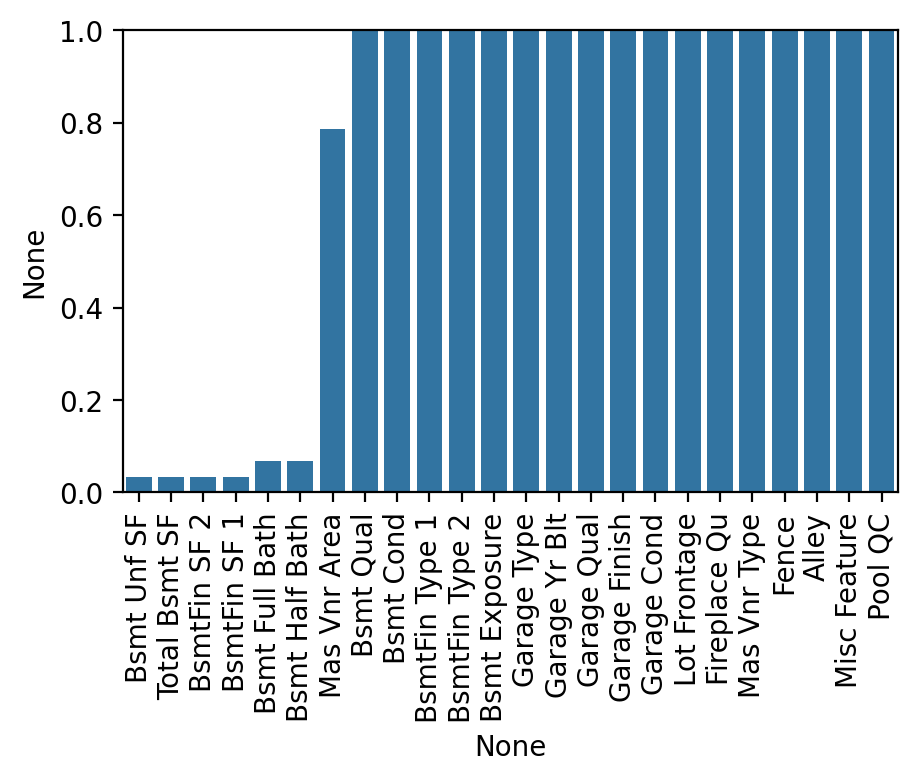

In [110]:
plt.figure(figsize = (5,3), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

So notice what happened is I had, originally,

a bunch of features here with Electrical,

Garage Area, Total Basement Square Footage,

Basement Uniform Square Footage or something like that.

but just dropping Electrical and Garage Cars

also dropped a couple of more rows.

Here we have four rows that are missing one,

and here notice we have eight features.

So essentially I took care of a problem

because these were just bad rows

that were missing a lot of information.

You'll notice what's interesting

is that a lot of these features

that we are missing for just a few rows happens

to be Basement features.

I suspect that this particular one

or two houses just didn't have a basement.

So maybe that was the issue.

Let's take a closer look again

at those basement missing features.

In [118]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [120]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


And you'll notice it's the exact same rows.

So the same two rows that are missing information

about Basement Half Bath are the same two rows

that are missing information on Basement Full Bath.

What'll be interesting is now to check Basements

this Unf Square Footage.

So let's go ahead and check that one again.

In [123]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


So clearly, I should either just drop these two rows,

or possibly be a little smarter about this,

and think of the fact that all of these features had

to do with the basement.

So let's take a look at what it means

for Basement Full Bath to be null.

Which means I have to come all the way back up

to this description and then search

for wherever Basement happened to be.

Let's take a look at what it means

for Basement Full Bath to be null.

Which means I have to come all the way back up

to this description and then search

for wherever Basement happened to be.


We can already see right here, Basement Quality NA

indicates no basement.

I can also see again Basement Condition,

NA indicates no basement.

Basement exposure, NA indicates no basement.

We see Basement Unf Square Footage.

That means Basement, unfinished square feet

of basement area.

I'm starting to think that it's very likely

that these houses didn't actually have a basement,

which is why they're just null values.

So instead of dropping those two rows,

how about we perform the following?

We do see that there are numerical basement columns,

like Total Basement Square Footage,

Basement Square Footage That's Unfinished,

Type Two Basement Finished Square Feet, et cetera.

All of these, if they're null,

let's just go ahead and set them equal to 0.

We'll kind of operate on the domain knowledge assumption

that it's very likely this particular house

just didn't have a basement, so they left it as null.

And in our case, we can go ahead

and safely say for the numerical ones

that that's going to be zero.

And then what we're gonna do is for things

like this Basement Quality and Basement Exposure, et cetera,

where they just left it as null,

we'll go ahead and fill it as none, a string.

Because notice the rest

of them are actually string categorical values as well.

**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical basement columns:

So what we're gonna do is create a list

of the basement numeric columnsrAnd,

but essentially what you have to do

is go through that description file

and list out anything that has to do with Basement

that is also numeric.

So for example, Basement Finished Square Footage,

Finished Square Footage Type 2,

Unfinished Square Footage,

Total Basement Square Footage.

And whether or not it's a Full Bath

or Half Bath included in the Basement.

All of those are numerics that either 0 or 1

or some sort 


And we're gonna do a very similar thing

for the basement string columns.

So those are things like Basement Quality,

Basement Conditions, et cetera.of square footage measurement.

In [130]:
pd.options.mode.copy_on_write = True

In [132]:
# BSMT Numeric Columns
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

The string basement columns:

In [134]:
# BSMT String Columns
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [143]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


So now if I were to run this command again,

asking where my data frame, do I have a null value

for Basement Full Bath?

You'll know it worked

if it gives you back zero rows, because that means

that we actually filled in Basement Full Bath up here,

when we actually did this command of fillna(0).

In [145]:
percent_nan_dummy = percent_missing(df)

(0.0, 1.0)

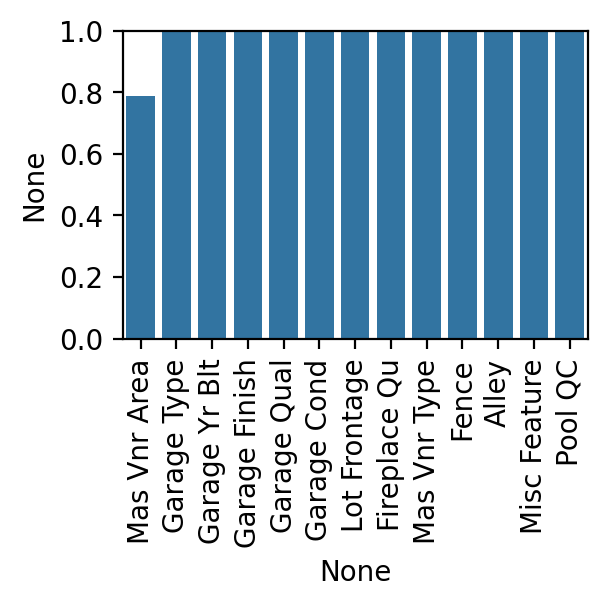

In [157]:
plt.figure(figsize = (3,2), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

So let's take a final look

at what MasVnrType actually means.

We can come back up to the description.txt file up here,

and eventually after scrolling through it,

you'll see that it has to do with the masonry veneer type

that is outside the house.

What we're gonna do

is we're gonna make a domain knowledge assumption

that if we were missing MasVnrType

and MasVnrArea, again that masonry veneer,

then I'm just gonna assume that it didn't have one.

And there is an option for None here,

but for whatever reason, it didn't happen to be filled in

for just a few rows.

Let's go ahead and just fill it in as None

and then fill in the square feet as 0

for those rows that don't happen

to have masonry veneer type.

So that's a pretty reasonable assumption to make.

What we're gonna do here then is the following.

I'm just gonna do the same commands as we did before.

In [168]:
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [170]:
percent_nan_dummy = percent_missing(df)

(0.0, 1.0)

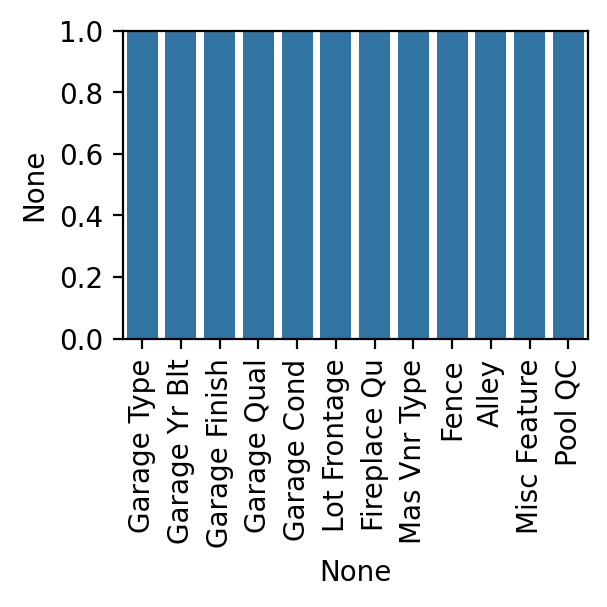

In [178]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (3,2), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy)
plt.xticks(rotation=90);

# Set 1% Threshold
plt.ylim(0,1)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Mas Vnr Type'),
  Text(8, 0, 'Fence'),
  Text(9, 0, 'Alley'),
  Text(10, 0, 'Misc Feature'),
  Text(11, 0, 'Pool QC')])

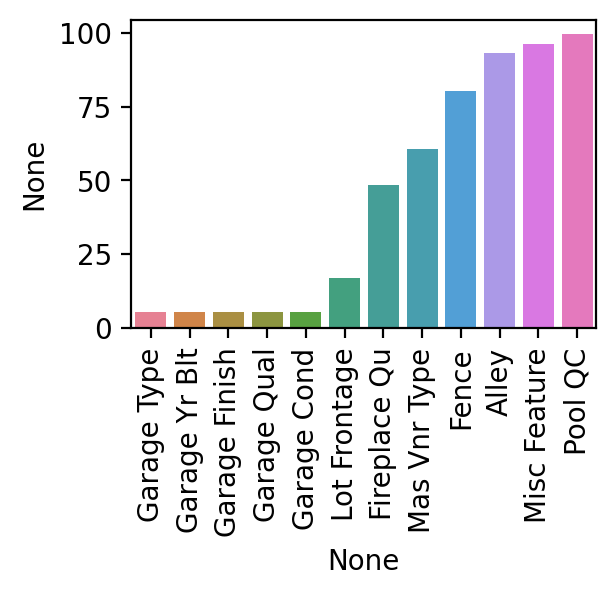

In [180]:
plt.figure(figsize = (3,2), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy,palette='husl' )
plt.xticks(rotation=90)

We are now dealing with missing data

that goes beyond that 1% threshold.

In other words, more than 1% of rows

are missing some of these feature values.

The other ones we already took care of,

which were just one or two rows

that we had to either remove or fill in values for.

And now what we need to do is decide

what to actually do of these features,

because it goes beyond just dropping a few rows

to not consider them.

So this is why we're talking about feature columns

instead of dropping rows, because at this point

we have to decide whether we're going to fill in

the missing values for an entire column

or just drop the feature column to begin with.

And I wanna consider the pros and cons

of each of these approaches.

So let's begin with dropping the feature column.

And you'll notice something here

as I didn't actually separate this out into pros versus cons

because some of these,

in fact, many of them are kind of two-sided coins.

So as far as dropping the feature column goes,

one thing that's really nice about this

is that it's extremely simple to do.

All we do is a df drop that column

along axis is equal to one.

So very simple to implement

and also very simple to understand.

If you're missing 99% of the actual values

for a particular feature,

it's unlikely that feature holds any predictive value.

So you'll just go ahead and drop it.

So we should consider dropping a feature

if many rows are actually null values

that we don't have any information for.

Now when it comes to something that could be a positive

is after you drop that feature,

you also no longer need to worry

about that feature in the future.

This is a bit of a two-sided coin.

If that feature, later on, in the future

becomes very important for predictive ability,

you unfortunately cannot then consider it into the feature.

That is because your model can only consider features

that it was trained on.

So later on, if a feature you dropped

is actually really important

and you want to add it back into your dataset,

unfortunately your model will not know

about that feature's existence.

Essentially, if we're thinking

about something like linear regression,

it's not gonna have a coefficient ready to go

for a feature that it was never trained on.

So that feature and that coefficient just don't exist,

which means if that feature did become really important

in the future, you would have to go back

and figure out how to fill in those missing values

for all that historical data set,

which may be simple or may be really hard.

So again, there also is the potential to lose a feature

with possible important signal.

And this becomes much harder

when, let's say, you're only missing 5 to 10%

of the data points.

At that point, it doesn't really make sense

to drop the feature column entirely,

but also you don't wanna drop 5 to 10% of your rows.

So that's where you have to move on

to figuring out how to fill in that missing feature data.

So what are the pros and cons here?

Well, at its core,

when you're filling in missing feature data,

you are potentially changing ground truth in the data.

At a certain point, you are, for better or for worse,

making up some data point.

It could be a very good estimation,

but you are at the beginning making it up

in order to fill in a missing point.

So you are changing the ground truth

of what you originally had in your data

and that's  And again, that's very difficult to do

and a lot of it depends on domain knowledge experience.where you must decide on a reasonable estimation

for that filled value.

What's also necessary is you must apply this transformation

to all future data for predictions.

So it's very likely that if in your current data set

you're missing about 50% of rows for any particular feature,

that incoming future data will also every once in a while

be missing values for that feature.

So as you read that in, you can't just leave it as a blank

or a null, you'll have to actually fill it in

based off your transformations,

which means, if later on

we want to actually execute this model into features,

we don't just actually save the model itself

but we'll also have to save functions

that are able to transform new incoming data sets

to match up our transformed

and filled in missing feature dataset.

So in the simplest case of filling in missing features,

and this is kind of actually really quite often true,

is that you'll simply replace all the null or NaN values

with a reasonable assumption.

In the real world, it's often the case

that something is null or missing

because it was implied to be zero.

So for example, if you were taking a survey of people

and they wanted a number of children

and they didn't have children,

maybe you just provide a missing value or null for children

when really you can easily fill it in for a zero.

So, always look for that particular case

because it's quite common.

Now let's talk about harder cases.

In that particular case,

what you need to do is use statistical methods

based on other columns to fill in the NaN or missing values.

And that's really where the arts and the mathematics

behind data science begin to merge

because you are going to have to use

your domain knowledge experience, reasonable human intuition

and combine that with statistical methods to figure out

how can we fill in these null or missing values

based off reasonable assumptions

where we do have information.

Let's consider a really simple example

of statistical estimation being used

for filling in the missing feature data.

Imagine that we have a dataset about some survey of people

and for whatever reason, we're missing some age data

for a couple of rows.

However, let's also imagine that we have feature data

for their current career trajectory

or their current education status.

What we could do is use that other feature data

and then maybe take the average based off what we know

of where we do have age data in the dataset.

For example, take the average age

of everyone that is in college

and then use that to fill in data

where the person we know is in college

but we don't know their age.

So for example, we could take the average

of everyone we know that is in college in the dataset,

get the answer of 20 years as our statistical estimation,

and then basically fill that in

for where we know the person is in college

but we don't know their age.

Now, is it likely that that particular person

where we were missing their age data,

but we knew they were in college

and filled it in as 20 is exactly 20 years old?

That's highly unlikely that we nailed it right on the dot.

However, it's not a bad assumption.

Now there are people who are much older

and are much younger that are going to be in college,

but overall we try to actually keep that data row

by filling it in with a statistical estimation.

Yes, at the end of the day,

we are kind of making something up

and getting further away from the ground truth,

but we're able to then have that actual data

as part of our model's training.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Garage Type'),
  Text(1, 0, 'Garage Yr Blt'),
  Text(2, 0, 'Garage Finish'),
  Text(3, 0, 'Garage Qual'),
  Text(4, 0, 'Garage Cond'),
  Text(5, 0, 'Lot Frontage'),
  Text(6, 0, 'Fireplace Qu'),
  Text(7, 0, 'Mas Vnr Type'),
  Text(8, 0, 'Fence'),
  Text(9, 0, 'Alley'),
  Text(10, 0, 'Misc Feature'),
  Text(11, 0, 'Pool QC')])

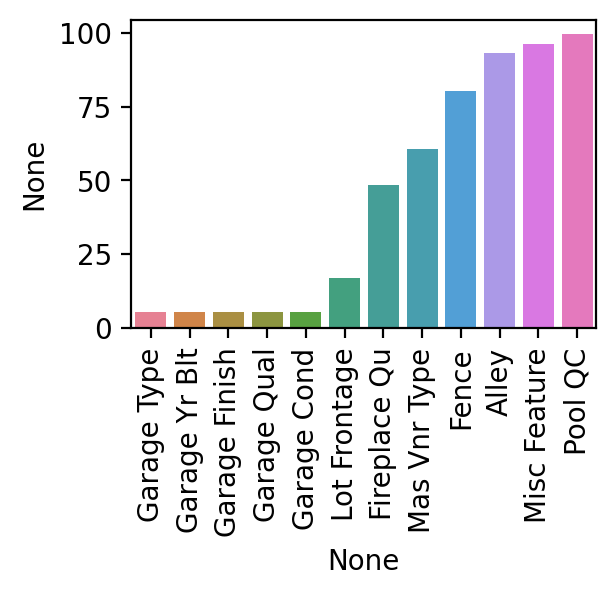

In [188]:
plt.figure(figsize = (3,2), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy,palette='husl' )
plt.xticks(rotation=90)

Notice we have a very similar problem occurring

like last time where we had a bunch of features

based off the basement that was missing.

Now we have a bunch of features based off the garage

that is missing.

In fact, you'll notice here

that it looks like all of these bars

are around the same height

and they're all related to garage, the garage condition,

garage quality, finish, year built, and type.

And if we scroll back up to the description here,

I can begin to see that it looks like garage type,

if it's missing the data,

that implies that it does not have a garage.

And that would probably mean if it doesn't have a garage,

then there's no year built for the garage,

which means there's no finish either.

So it actually looks like when you're missing data,

it just means you don't have a garage.

What we're gonna do then

is kind of the same thing we did with basement.

If we have a categorical column that is based off garage,

like garage location, instead of having it as a null value,

I simply need to replace this with a string

called something like none.

Let's go ahead and do that.

In [190]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

So these are all string qualifiers

that if we read the description clearly, if they're missing,

then we can just replace this

with some sort of string value.

In [193]:
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [195]:
percent_nan_dummy = percent_missing(df)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Garage Yr Blt'),
  Text(1, 0, 'Lot Frontage'),
  Text(2, 0, 'Fireplace Qu'),
  Text(3, 0, 'Mas Vnr Type'),
  Text(4, 0, 'Fence'),
  Text(5, 0, 'Alley'),
  Text(6, 0, 'Misc Feature'),
  Text(7, 0, 'Pool QC')])

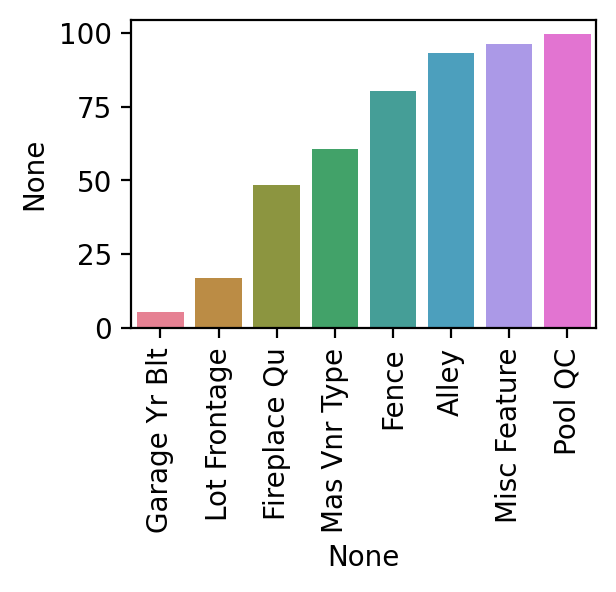

In [197]:
plt.figure(figsize = (3,2), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy,palette='husl' )
plt.xticks(rotation=90)

And here, now we can clearly see

that the only issue for garages are the garage year built.

And I already know that's a numeric column

so I'd have to figure out

do I kind of want to keep this feature, fill it in,

I definitely wanna keep it

because there's only a few percentage of rows

that are missing it.

And as far as filling it in,

it's not too crazy to fill it in with the year zero.

The year zero is such an extreme deviation

from a typical year that a garage would be built

something like 1986 or 1985, et cetera,

that it's not too bad of a choice

just to say zero as a fill in for not having a garage.

Keep in mind, this is kind of a very arbitrary decision

to just set it to zero,

but it's also not an unreasonable one to make.

Obviously, your domain knowledge

would have to come into play here.

And something else you can do

is check out the average values for garage year built

and fill it in that way as well.

In [200]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [202]:
percent_nan_dummy = percent_missing(df)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Mas Vnr Type'),
  Text(3, 0, 'Fence'),
  Text(4, 0, 'Alley'),
  Text(5, 0, 'Misc Feature'),
  Text(6, 0, 'Pool QC')])

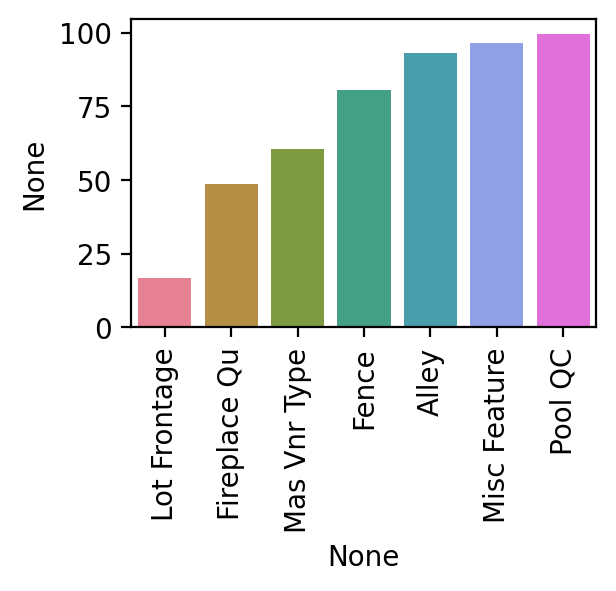

In [204]:
plt.figure(figsize = (3,2), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy,palette='husl' )
plt.xticks(rotation=90)

Now you could take a look at the description text

and probably fill this in with zeros

because most likely if you don't have a pool quality,

it's because you don't have a pool,

so you could just fill it in as like a zero parameter.

But in our case, we do wanna show you

how to drop data features if they're not useful

or if you're missing quite a bit of information from them.

And it is technically the easier approach here.

So what we're gonna do is just simply the following.

In [207]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [211]:
percent_nan_dummy = percent_missing(df)

([0, 1, 2],
 [Text(0, 0, 'Lot Frontage'),
  Text(1, 0, 'Fireplace Qu'),
  Text(2, 0, 'Mas Vnr Type')])

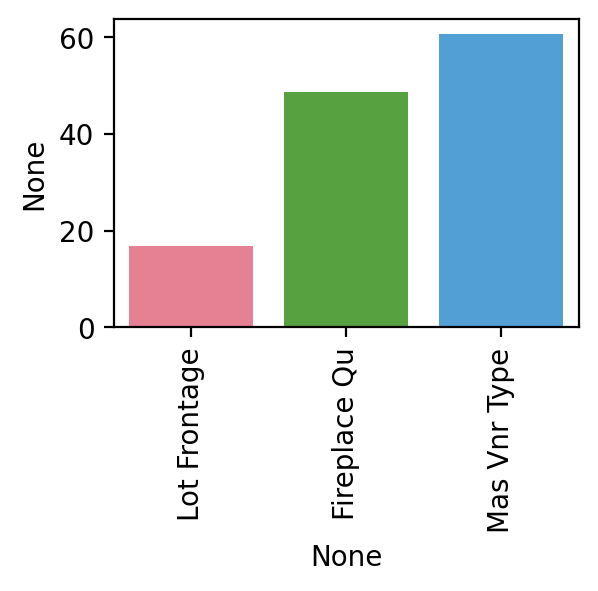

In [213]:
plt.figure(figsize = (3,2), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy,palette='husl' )
plt.xticks(rotation=90)

And this is where we're really kind of not in trouble,

but we're really have to be careful and do a lot of thinking

because we can't just drop the rows

and we also just can't drop the feature column.

We're right in that trouble area of not enough is missing

to drop the feature, but not too little is missing

to just drop a couple of rows.

If we explore these columns further, such as fireplace Qu,

I can see what are the unique availabilities there

In [216]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

And it looks like they're actually string values.

There's Gd, Ta, Fa, Po, and Ex.

So since this is a string column that I'm going to fill,

I'm just gonna fill NAs as none

as we've been doing earlier.

In [219]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

Now we have to deal only with Lot Frontage, but it is a bit tricky now as it is a Numeric Column


I do need to figure out how to fill in this data

and this is where the hardest part comes into play,

where it's, what is the statistical estimation we can use

based off another column in order to fill this in?

So what we're gonna do is we're actually going to use

the neighborhood value for this.

And if you take a look at the desciption text,

The description text says the following,

that the neighborhood is the physical location

within the city limits.

And the lot frontage is the linear feet of street

connected to  i.e Linear feet of street connected to property" ka matlab hai zameen ki wo lambai jo seedha sadak ke saath judi hui hai.roperty.

And so we're gonna say

that we're gonna make a domain knowledge assumption

that the lot frontage that is the linear feet of street

that's connected to the property

is going to depend somewhat on the neighborhood.

And we could make a box plot showing this,

something like sns box plot

and show lot frontage distributions versus neighborhood,

Are me Mas Vnr Type pr FILL NA with none krna bhul gya tha wo bhi kr dia. So now we are back to what we were earlier discussing
that the only feature left is Lot Frontage

In [224]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")

In [226]:
percent_nan_dummy = percent_missing(df)

([0], [Text(0, 0, 'Lot Frontage')])

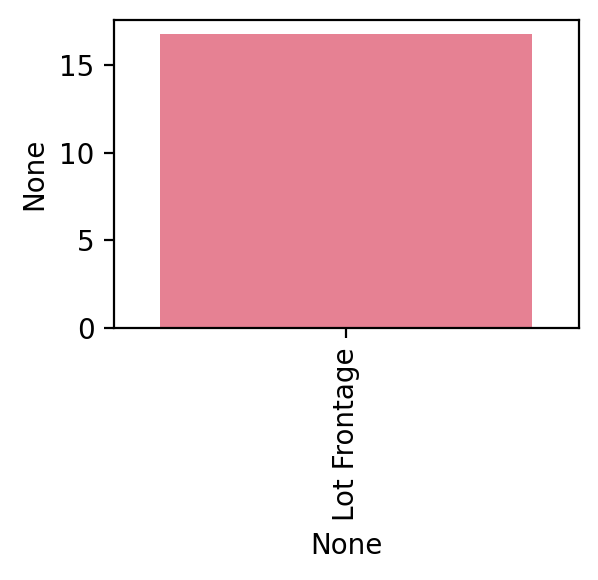

In [228]:
plt.figure(figsize = (3,2), dpi = 200)
sns.barplot(x=percent_nan_dummy.index,y=percent_nan_dummy,palette='husl' )
plt.xticks(rotation=90)

## How Lot Frontage and Neighbourhood can be connected

Possible Relationships Between Lot Frontage and Neighborhood:
High-End Neighborhoods:

Premium neighborhoods me zyada large Lot Frontages hote hain, kyunki waha ki properties badi aur spacious hoti hain.
Examples: Luxury homes ke samne ka area (frontage) zyada hota hai, jisse privacy aur accessibility dono milein.
Urban Neighborhoods:

Cities ke congested areas me Lot Frontage chhoti hoti hai, kyunki waha zyada log ek limited space me rehte hain.
Examples: Flats aur row houses me kam frontage hota hai.
Suburban Neighborhoods:

Suburbs me moderate Lot Frontages hote hain, jaha ghar medium size ke aur properly spaced hote hain.
Development Planning:

Naye developing areas me Lot Frontages standardized hote hain, jaha planners ne uniform design rakhi ho.

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

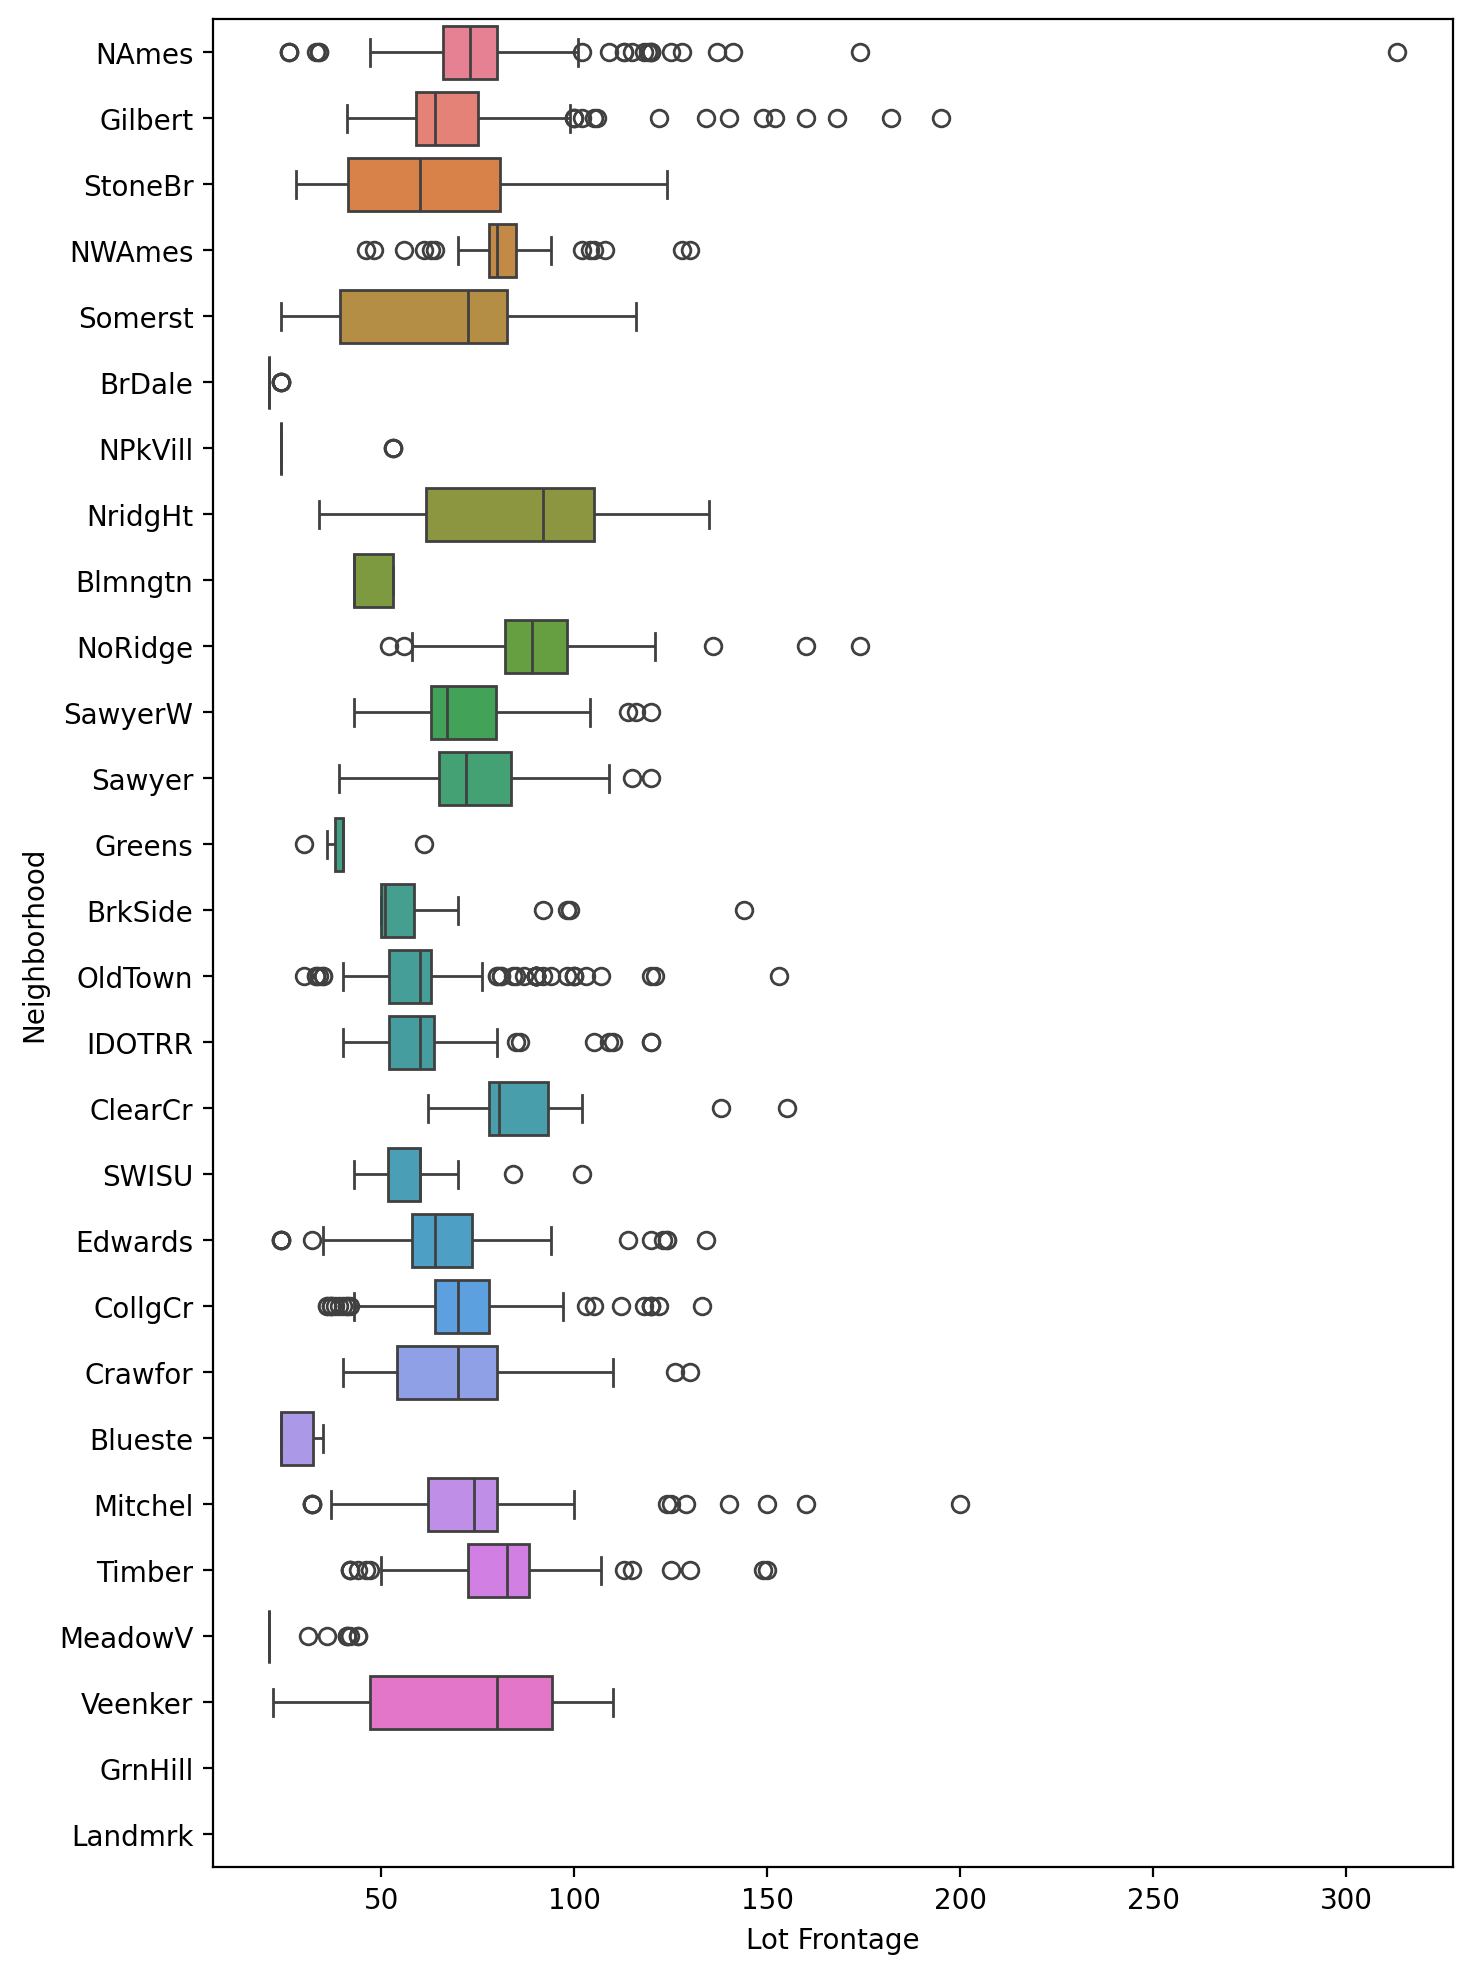

In [243]:
plt.figure(figsize=(8,12), dpi = 200)
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h', palette='husl')

Now is this a perfect assumption to kind of declare

that each neighborhood is unique enough?

That I can say,

okay, the average value maybe somewhere around the mean

or even the median is going to be the filled in value?

Yes and no, there are quite a bit of outliers,

especially in certain neighborhoods, we can see that

or the distribution is very wide,

but it's not unreasonable to think

that the linear feet of street

that's connected to your property

is going to be somewhat dependent on your neighborhood.

And what's nice about this neighborhood

is there's plenty of categories here.

And what we could do then, is using domain knowledge,

again, this is a bit of an assumption,

but we'll say that if I'm missing a value

but I have the neighborhood value,

recall, I'm not missing any neighborhood values,

then I am going to just fill in the average lot frontage

for that neighborhood.

In [246]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

What it does:
groupby('Neighborhood'): Groups the dataset (df) by the unique values in the Neighborhood column.

For example, if Neighborhood has values like ["A", "B", "C"], it creates separate groups for each neighborhood.
['Lot Frontage']: Selects the Lot Frontage column for each group (i.e., for each neighborhood).

.mean(): Calculates the average (mean) of the Lot Frontage values for each neighborhood group.

In [248]:
percent_nan_dummy

Lot Frontage    16.752137
dtype: float64

In [254]:
print(df['Neighborhood'].isnull().sum())

0


# Ab tu confuse hora hai ki yrr sala ek bhi nan ya null value hai nhi phir ye NaN kese aa gya mean me kyunki
# mean ki value lot frontage ki mean hai jo ki each neighbourhood k lie nikali gayi hai, Tune group by Neighbourhood
# column se, For eg  yaha pr Jitne bhi ghar the Landmark, Norridge, oldtown un sbka Lot frontage ka average aya hai xyz. Ab 
# usi me GreenHill aur Landmark ke waha ke kuch gharo ka Lot Frontage NaN values raha hoga islie Mean Nan dikha rha hai

In [260]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [265]:
df.groupby('Neighborhood')['Lot Frontage'] # iski baat ho rhi hai niche

Recall, that when you actually run this,

it's going to be a lazy function.

So if I insert a cell below and just run this,

what I mean by a lazy function

is it's actually not gonna do anything yet

because it's waiting

to have some sort of method called on it.

So it's just a group by object

waiting for you to call something like dot mean

or dot sum, et cetera.

So this one is waiting for something to be called on it.

And so what we're gonna call on it is not dot mean

or dot sum, but it's gonna be a little different,

it's this dot transform.

And then the dot transform allows us to use something

that's very similar to an apply call

where we take the value of the row

and then we're gonna say value fillna

with that value's mean

and essentially then mean is being called over here

on this actual group by.

So that when we run this,

it's gonna fill in anything that was missing

with the a

verage value for that particular neighborhood,

In [267]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [269]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      3
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

We can see that we are still missing 3 values here. 

And so at this point we do have to decide

what are we gonna do with these three values

that we're missing?

We could do something like just drop these rows

that happens to still be missing a lot frontage values.

And you may be wondering,

why we're missing these lot frontage values?

Well, it's because for some of these,

there just happens to be Greenhill, which is not available

or Landmark, which is not available.

And what we're gonna assume is for these particular cases

that it's not available

is that actually getting the feature for lot frontage

was not making sense, maybe it's not applicable,

so we'll just fill it in as zero.

So we're only doing this now for three rows.

So it's not so bad to just fill it in as zero

instead of trying to do something a little more clever

like filling it in based off the neighborhood.

In [274]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [276]:
df['Lot Frontage'].isnull().sum()

0

In [278]:
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 76, dtype: int64

# ISKE NICHE KA SAB ALAG HAI CLASS KO FOLLOW KRTE HUE ISKE UPAR JO BHI HAI WAHI PADHA HAI

## Dropping Rows

A few of these features appear that it is just one or two rows missing the data. Based on our description .txt file of the dataset, we could also fill in these data points easily, and that is the more correct approach, but here we show how to drop in case you find yourself in a situation where it makes more sense to drop a row, based on missing column features.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [24]:
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [25]:
percent_nan = percent_missing(df)

(0.0, 1.0)

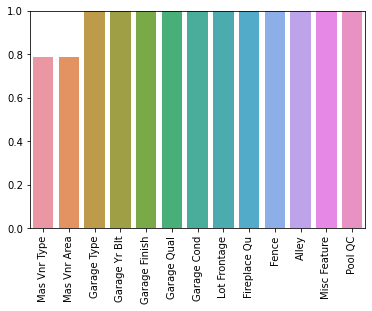

In [26]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

### Mas Vnr Feature 

Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [27]:
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)

In [28]:
percent_nan = percent_missing(df)

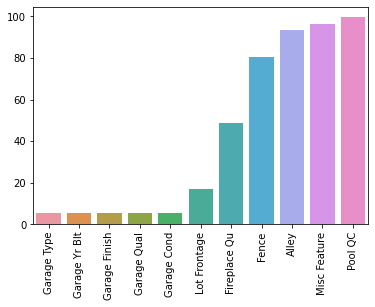

In [29]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Filling In Missing Column Data

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

### Garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [30]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2922,Detchd,Unf,TA,TA
2923,Attchd,Unf,TA,TA
2924,NaN,NaN,NaN,NaN
2925,Attchd,RFn,TA,TA


In [31]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [32]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [33]:
percent_nan = percent_missing(df)

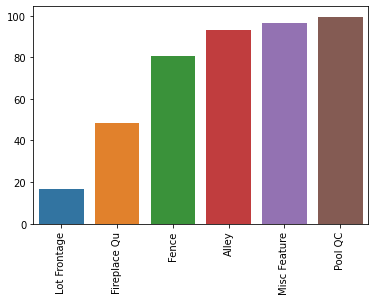

In [34]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Dropping Feature Columns

Sometimes you may want to take the approach that above a certain missing percentage threshold, you will simply remove the feature from all the data. For example if 99% of rows are missing a feature, it will not be predictive, since almost all the data does not have any value for it. In our particular data set, many of these high percentage NaN features are actually plasceholders for "none" or 0. But for the sake of showing variations on dealing with missing data, we will remove these features, instead of filling them in with the appropriate value.

In [35]:
percent_nan.index

Index(['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature',
       'Pool QC'],
      dtype='object')

In [36]:
df[['Lot Frontage', 'Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC']]

,Lot Frontage,Fireplace Qu,Fence,Alley,Misc Feature,Pool QC
0,141.0,Gd,NaN,NaN,NaN,NaN
1,80.0,NaN,MnPrv,NaN,NaN,NaN
2,81.0,NaN,NaN,NaN,Gar2,NaN
3,93.0,TA,NaN,NaN,NaN,NaN
4,74.0,TA,MnPrv,NaN,NaN,NaN
...,...,...,...,...,...,...
2922,37.0,NaN,GdPrv,NaN,NaN,NaN
2923,NaN,NaN,MnPrv,NaN,NaN,NaN
2924,62.0,NaN,MnPrv,NaN,Shed,NaN
2925,77.0,TA,NaN,NaN,NaN,NaN


In [37]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [38]:
percent_nan = percent_missing(df)

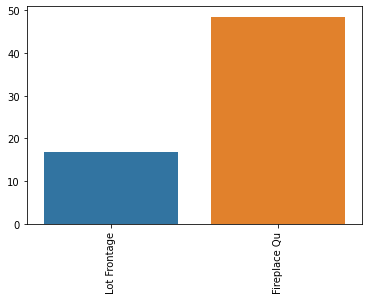

In [39]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Filling in Fireplace Quality based on Description Text

In [40]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [41]:
percent_nan = percent_missing(df)

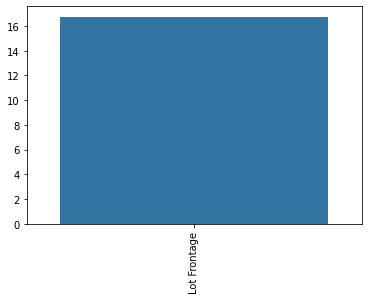

In [42]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [43]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

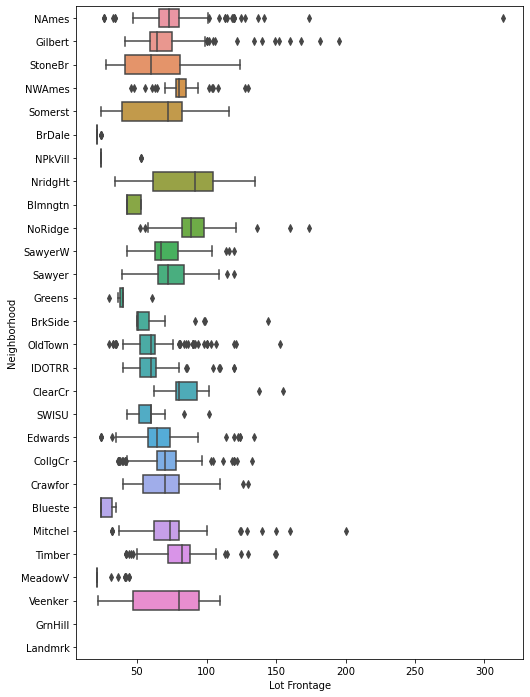

In [44]:
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h')

## Impute Missing Data based on other Features

There are more complex methods, but usually the simpler the better, it avoids building models on top of other models.

More Info on Options: https://scikit-learn.org/stable/modules/impute.html

In [45]:
df.groupby('Neighborhood')['Lot Frontage']

In [46]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

## Transform Column

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [47]:
df.head()['Lot Frontage']

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
Name: Lot Frontage, dtype: float64

In [48]:
df[df['Lot Frontage'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
11,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,500,3,2010,WD,Normal,185000
14,120,RL,NaN,6820,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,140,0,0,6,2010,WD,Normal,212000
22,60,FV,NaN,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,WD,Normal,216000
23,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,20,RL,NaN,12537,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,149900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2891,20,RL,NaN,16669,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2006,WD,Normal,228000
2894,60,RL,NaN,11170,Pave,IR2,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2006,WD,Normal,250000
2895,20,RL,NaN,8098,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2006,WD,Normal,202000
2909,90,RL,NaN,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,3,2006,WD,Normal,146500


In [49]:
df.iloc[21:26]['Lot Frontage']

21    85.0
22     NaN
23     NaN
24     NaN
25    65.0
Name: Lot Frontage, dtype: float64

In [50]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

0       141.000000
1        80.000000
2        81.000000
3        93.000000
4        74.000000
           ...    
2922     37.000000
2923     75.144444
2924     62.000000
2925     77.000000
2926     74.000000
Name: Lot Frontage, Length: 2925, dtype: float64

In [51]:
df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean())).iloc[21:26]

21    85.000000
22    64.549383
23    75.210667
24    75.210667
25    65.000000
Name: Lot Frontage, dtype: float64

In [52]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [53]:
percent_nan = percent_missing(df)

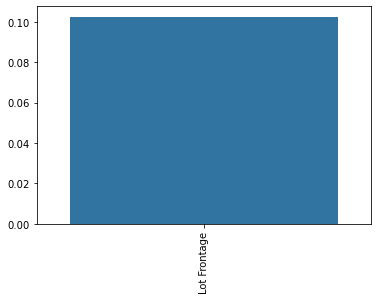

In [54]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [55]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [56]:
percent_nan = percent_missing(df)

In [57]:
percent_nan

Series([], dtype: float64)

Great! We no longer have any missing data in our entire data set! Keep in mind, we should eventually turn all these transformations into an easy to use function. For now, lets' save this dataset:

In [58]:
df.to_csv("../DATA/Ames_NO_Missing_Data.csv",index=False)

----